# Experimentation: Data Pre-Processing
---

In [15]:
# Import libraries
from monai.data import DataLoader
from monai.transforms import (EnsureChannelFirstd,
Compose, LoadImaged, ResampleToMatchd)

from monai.apps import TciaDataset
from monai.apps.auto3dseg import AutoRunner
from monai.bundle import ConfigParser

from monai.config import print_config
import json

print_config()


MONAI version: 1.3.0
Numpy version: 1.26.4
Pytorch version: 2.2.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: 4.7.3
TorchVision version: 0.17.1
tqdm version: 4.66.2
lmdb version: 1.4.1
psutil version: 5.9.8
pandas version: 2.2.1
einops version: 0.7.0
transformers version: 4.38.2
mlflow version: 2.11.1
pynrrd version: 1.0.0
clearml version: 1.14.5rc0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [24]:
# Specify the collection and segmentation type
collection, seg_type = "HCC-TACE-Seg", "SEG"

# Create a dictionary to map the labels in the segmentation to the labels in the image
label_dict = {'Liver': 0,
  'Tumor': 1,
  'vessels': 2,
  'aorta': 3}

# Create a composed transform that loads the image and segmentation, then resamples the image to match the segmentation
transform = Compose(
    [
        LoadImaged(reader="PydicomReader", keys=["image", "label"], label_dict=label_dict),
        EnsureChannelFirstd(keys=["image", "label"]),
        ResampleToMatchd(keys="image", key_dst="label"),
    ]
)

# Create a dataset for the training and test data
train_dataset = TciaDataset(
    root_dir="../data/train",
    collection=collection,
    section="training",
    transform=transform,
    download=True,
    download_len=5,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.2,
)

test_dataset = TciaDataset(
    root_dir="../data/test",
    collection=collection,
    section="test",
    transform=transform,
    download=True,
    download_len=2,
    seg_type=seg_type,
    progress=True,
    cache_rate=0.0,
    val_frac=0.0,
)

1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip: 104kB [00:01, 104kB/s]  


2024-03-11 08:49:24,571 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip
2024-03-11 08:49:24,572 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip.
2024-03-11 08:49:24,575 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.


1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip: 15.8MB [00:31, 525kB/s] 


2024-03-11 08:49:57,252 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip
2024-03-11 08:49:57,252 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip.
2024-03-11 08:49:57,252 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\HCC_017\300\image.


1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip: 72.0kB [00:01, 67.1kB/s]


2024-03-11 08:49:58,585 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip
2024-03-11 08:49:58,585 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip.
2024-03-11 08:49:58,585 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.


1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip: 20.8MB [00:35, 613kB/s] 


2024-03-11 08:50:34,619 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip
2024-03-11 08:50:34,619 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip.
2024-03-11 08:50:34,619 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\HCC_077\300\image.


1.2.276.0.7230010.3.1.3.8323329.2159.1600929114.382937.zip: 80.0kB [00:01, 80.5kB/s]


2024-03-11 08:50:35,937 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2159.1600929114.382937.zip
2024-03-11 08:50:35,937 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2159.1600929114.382937.zip.
2024-03-11 08:50:35,937 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.2159.1600929114.382937.


1.3.6.1.4.1.14519.5.2.1.1706.8374.328381013969207951913699003250.zip: 21.5MB [00:31, 728kB/s] 


2024-03-11 08:51:07,475 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.328381013969207951913699003250.zip
2024-03-11 08:51:07,475 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.328381013969207951913699003250.zip.
2024-03-11 08:51:07,475 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\HCC_081\300\image.


1.2.276.0.7230010.3.1.3.8323329.2015.1600929060.445346.zip: 96.0kB [00:01, 94.9kB/s]


2024-03-11 08:51:08,841 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2015.1600929060.445346.zip
2024-03-11 08:51:08,841 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2015.1600929060.445346.zip.
2024-03-11 08:51:08,841 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.2015.1600929060.445346.


1.3.6.1.4.1.14519.5.2.1.1706.8374.248128077663297154202444477856.zip: 26.0MB [00:50, 536kB/s] 


2024-03-11 08:52:00,516 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.248128077663297154202444477856.zip
2024-03-11 08:52:00,516 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.248128077663297154202444477856.zip.
2024-03-11 08:52:00,516 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\HCC_073\300\image.


1.2.276.0.7230010.3.1.3.8323329.1619.1600928909.284416.zip: 136kB [00:01, 76.6kB/s] 


2024-03-11 08:52:02,815 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.1619.1600928909.284416.zip
2024-03-11 08:52:02,815 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.1619.1600928909.284416.zip.
2024-03-11 08:52:02,815 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.1619.1600928909.284416.


1.3.6.1.4.1.14519.5.2.1.1706.8374.168467877926914067122086638555.zip: 22.3MB [00:24, 960kB/s] 


2024-03-11 08:52:27,667 - INFO - Downloaded: ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.168467877926914067122086638555.zip
2024-03-11 08:52:27,667 - INFO - Expected md5 is None, skip md5 check for file ..\data\train\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.168467877926914067122086638555.zip.
2024-03-11 08:52:27,682 - INFO - Writing into directory: ..\data\train\HCC-TACE-Seg\HCC_051\300\image.


1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip: 104kB [00:01, 104kB/s]  


2024-03-11 08:52:31,024 - INFO - Downloaded: ..\data\test\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip
2024-03-11 08:52:31,024 - INFO - Expected md5 is None, skip md5 check for file ..\data\test\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.zip.
2024-03-11 08:52:31,024 - INFO - Writing into directory: ..\data\test\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.41.1604860085.518229.


1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip: 15.8MB [00:29, 569kB/s] 


2024-03-11 08:53:00,570 - INFO - Downloaded: ..\data\test\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip
2024-03-11 08:53:00,570 - INFO - Expected md5 is None, skip md5 check for file ..\data\test\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.172517341095680731665822868712.zip.
2024-03-11 08:53:00,570 - INFO - Writing into directory: ..\data\test\HCC-TACE-Seg\HCC_017\300\image.


1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip: 72.0kB [00:00, 73.9kB/s]


2024-03-11 08:53:01,804 - INFO - Downloaded: ..\data\test\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip
2024-03-11 08:53:01,804 - INFO - Expected md5 is None, skip md5 check for file ..\data\test\HCC-TACE-Seg\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.zip.
2024-03-11 08:53:01,804 - INFO - Writing into directory: ..\data\test\HCC-TACE-Seg\raw\1.2.276.0.7230010.3.1.3.8323329.2087.1600929091.391108.


1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip: 20.8MB [00:41, 529kB/s] 


2024-03-11 08:53:43,457 - INFO - Downloaded: ..\data\test\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip
2024-03-11 08:53:43,457 - INFO - Expected md5 is None, skip md5 check for file ..\data\test\HCC-TACE-Seg\1.3.6.1.4.1.14519.5.2.1.1706.8374.231513034103627633230071228105.zip.
2024-03-11 08:53:43,457 - INFO - Writing into directory: ..\data\test\HCC-TACE-Seg\HCC_077\300\image.


In [25]:
print(train_dataset.datalist)

[{'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_017\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_017\\300\\seg'}, {'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_051\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_051\\300\\seg'}, {'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_077\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_077\\300\\seg'}, {'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_081\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_081\\300\\seg'}]


In [26]:
data_list = {"training": train_dataset.datalist, "testing": test_dataset.datalist}

datalist_file = "../auto3dseg_datalist.json"
with open(datalist_file, "w") as f:
    json.dump(data_list, f)

[{'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_017\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_017\\300\\seg'}, {'image': '..\\data\\train\\HCC-TACE-Seg\\HCC_051\\300\\image', 'seg': '..\\data\\train\\HCC-TACE-Seg\\HCC_051\\300\\seg'}]


In [27]:
# Create a dataloader
train_loader = DataLoader(train_dataset, batch_size=1, num_workers=2)

In [28]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

In [29]:
# Print the batch data keys
print(batch.keys())

# Print the batch data shapes
print(batch["image"].shape, batch["seg"].shape)

# Print the batch data types
print(batch["image"].dtype, batch["seg"].dtype)

dict_keys(['image', 'seg'])
torch.Size([1, 1, 512, 512, 63]) torch.Size([1, 4, 512, 512, 63])
torch.float32 torch.float32


In [30]:
# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

torch.Size([512, 512]) torch.Size([512, 512])


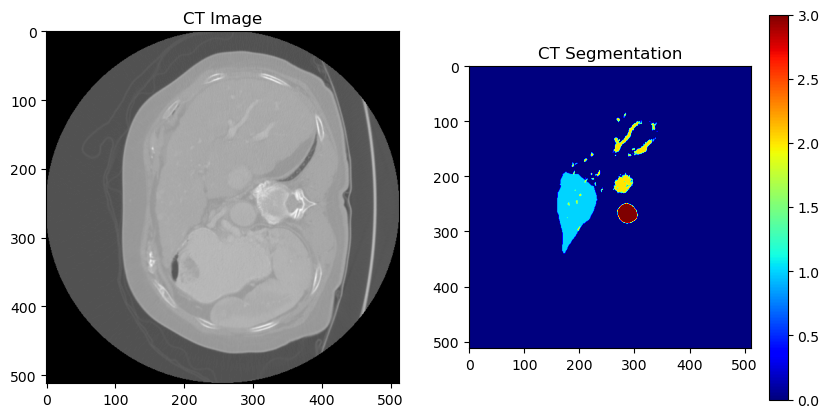

In [31]:
import torch
import matplotlib.pyplot as plt

# Sample a slice from the image
CT_slice = image[0, 0, :, :, 45]

# Get the maximum segmentation class for each pixel in the slice
_, CT_seg_slice_max = torch.max(seg[0, :, :, :, 45], dim=0)

print(CT_slice.shape, CT_seg_slice_max.shape)

# Plot the image and segmentation slice as a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(CT_slice, cmap="gray")
axes[0].set_title("CT Image")
axes[1].imshow(CT_seg_slice_max, cmap="jet")
axes[1].set_title("CT Segmentation")
plt.colorbar(mappable=axes[1].imshow(CT_seg_slice_max, cmap='jet'), ax=axes[1])
plt.show()

## Setup AutoRunner for automatic segmentation model training and hyperparameter finetuning
---

In [34]:
# Set the working directory
work_dir = "../data/auto3dseg"

# Create input configuration .yaml file
input_config = {
    "name": "HCC-TACE-Seg",
    "task": "segmentation",  
    "modality": "CT", 
    "datalist": "../auto3dseg_datalist.json", 
    "dataroot": work_dir, 
}

config_yaml = "../auto3dseg_config.yaml"
ConfigParser.export_config_file(input_config, config_yaml)

In [36]:
train_param = {
    "num_epochs_per_validation": 1,
    "num_images_per_batch": 1,
    "num_epochs": 1,
    "num_warmup_epochs": 1,
    "num_images_per_batch": 2,
}

# Create an AutoRunner
runner = AutoRunner(work_dir= work_dir,input=input_config, train=True, analyze=True, algos="swinunetr")
runner.set_training_params(train_param)
runner.set_num_fold(num_fold = 1)
runner.run()

2024-03-11 08:57:10,194 - INFO - AutoRunner using work directory ../data/auto3dseg
2024-03-11 08:57:10,197 - INFO - Setting num_fold 5 based on the input datalist c:\Users\20191678\OneDrive - TU Eindhoven\5ARIP10 - Interdisiplinary Team Project T3 G3\5ARIP10-ITP-T3G3\data\auto3dseg\auto3dseg_datalist.json.
2024-03-11 08:57:10,208 - INFO - Using user defined command running prefix , will override other settings
2024-03-11 08:57:10,210 - INFO - Running data analysis...
2024-03-11 08:57:10,212 - INFO - Found 0 GPUs for data analyzing!
2024-03-11 08:57:10,218 - INFO - device=cuda:0 but CUDA device is not available, using CPU instead.


  0%|          | 0/5 [00:20<?, ?it/s]


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
                                                                               ^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\io\dictionary.py", line 162, in __call__
    data = self._loader(d[key], reader)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\io\array.py", line 255, in __call__
    img = reader.read(filename)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\data\image_reader.py", line 258, in read
    img_.append(itk.imread(name, **kwargs_))
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\itk\support\extras.py", line 1293, in imread
    reader = template_reader_type.New(**kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\itk\support\template_class.py", line 661, in New
    return self._NewImageReader(
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\itk\support\template_class.py", line 160, in _NewImageReader
    raise RuntimeError(
RuntimeError: Could not create IO object for reading file ..\data\auto3dseg\..\data\train\HCC-TACE-Seg\HCC_017\300\image
The file doesn't exist. 
Filename = ..\data\auto3dseg\..\data\train\HCC-TACE-Seg\HCC_017\300\image

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 141, in apply_transform
    return _apply_transform(transform, data, unpack_items, lazy, overrides, log_stats)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 98, in _apply_transform
    return transform(data, lazy=lazy) if isinstance(transform, LazyTrait) else transform(data)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\compose.py", line 335, in __call__
    result = execute_compose(
             ^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\compose.py", line 111, in execute_compose
    data = apply_transform(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.io.dictionary.LoadImaged object at 0x000002688A177690>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\data\dataset.py", line 112, in __getitem__
    return self._transform(index)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\data\dataset.py", line 98, in _transform
    return apply_transform(self.transform, data_i) if self.transform is not None else data_i
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\20191678\AppData\Local\anaconda3\envs\ITP\Lib\site-packages\monai\transforms\transform.py", line 171, in apply_transform
    raise RuntimeError(f"applying transform {transform}") from e
RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x000002688A1774D0>
